<a href="https://colab.research.google.com/github/ErikSeras/usos_r_python/blob/main/analisis_espacial/002_manejar_netCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manejo de archivos netCDF

Elaborado por: __Erik Seras__

Tutoriales que ayudaron a desarrollar el presente ejercicio:
- https://www.youtube.com/watch?v=ue55Mxe4yVQ
- https://www.youtube.com/watch?v=XGUS6DYZfCc
- https://www.youtube.com/watch?v=hrm5RmsVXo0
- https://www.youtube.com/watch?v=r5m_aU5V6oY&t=3s
- https://www.youtube.com/watch?v=dSv3-obKv3M

# 1 Instalaciones previas

Archivos que ayudan a procesar data espacial.

In [ ]:
! sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable
! sudo apt-get update
! sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev
! sudo apt-get install libprotobuf-dev protobuf-compiler libv8-dev libjq-dev

https://stackoverflow.com/questions/40374441/python-basemap-module-impossible-to-import

In [ ]:
# Instalar basemap
! sudo apt-get install geos
! sudo pip3 install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
# Necesario para extraer archivos de zip
! pip install patool

In [ ]:
# Necesario para trabajar con archivos netCDF
! pip install netCDF4

In [ ]:
# Necesario para hacer GIF
! pip install Pillow

# 2 Descargar datos de precipitación y temperatura

Datos de temperatura para la región monzónica de Asia se puede encontrar en la plataforma [APHRODITE](http://aphrodite.st.hirosaki-u.ac.jp/index.html).

## 2.1 Descargar datos

In [6]:
import requests 
import numpy as np

Cree su cuenta en la plataforma de [APHRODITE-2](http://aphrodite.st.hirosaki-u.ac.jp/download/create/) par apoder acceder a los archivos.

In [7]:
# El usename y el password le llegará a su correo cuando se registre
username = '...'
password = '...'

# Rango de años que desea descargar
years = np.arange(1961,1967)

In [8]:
# Loop que permite descargar los archivos
for year in years:
    url = 'http://aphrodite.st.hirosaki-u.ac.jp/product/APHRO_V1808_TEMP/APHRO_MA/025deg_nc/APHRO_MA_TAVE_025deg_V1808.'+ str(year)+ '.nc.gz'
    r = requests.get(url, auth=(username,password), allow_redirects = True)
    open(str(year)+'.gz', 'wb').write(r.content)

## 2.2 Extraer los archivos

In [9]:
import patoolib
import os

In [ ]:
# Loop para extraer los archivos .nc
for zipfiles in os.listdir():
    if zipfiles[-3: ] == '.gz':
        patoolib.extract_archive(zipfiles, outdir = r'netCDF_Temparature')

# 3 Manejar los datos netCDF

In [11]:
from netCDF4 import Dataset
import numpy as np

## 3.1 Leer un archivo netCDF

In [12]:
# Leer un archivo netCDF
data = Dataset(r'netCDF_Temparature/APHRO_MA_TAVE_025deg_V1808.1961.nc')

In [13]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: APHRO_MA V1808 daily temperature with 0.25deg grids
    dimensions(sizes): lon(360), lat(280), time(365)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 time(time), float32 tave(time, lat, lon), float32 rstn(time, lat, lon)
    groups: 


## 3.2 Visualizar el nombre de las variables

In [14]:
lon = data.variables['lon']
print(lon)

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    units: degrees_east
    long_name: Longitude
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [15]:
lat = data.variables['lat']
print(lat)

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    units: degrees_north
    long_name: Latitude
unlimited dimensions: 
current shape = (280,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [16]:
time = data.variables['time']
print(time)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: minutes since 1961-01-01 00:00
unlimited dimensions: time
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [17]:
tave = data.variables['tave']
print(tave)

<class 'netCDF4._netCDF4.Variable'>
float32 tave(time, lat, lon)
    _FillValue: -99.9
    units: degrees centigrade
    long_name:  daily mean temperature analysis interpolated onto 0.25deg grids
unlimited dimensions: time
current shape = (365, 280, 360)
filling on


## 3.3 Acceder a la data de las variables

In [18]:
# Los datos se encuentran en minutos
time_data = data.variables['time'][:]
print(time_data)

[     0.   1440.   2880.   4320.   5760.   7200.   8640.  10080.  11520.
  12960.  14400.  15840.  17280.  18720.  20160.  21600.  23040.  24480.
  25920.  27360.  28800.  30240.  31680.  33120.  34560.  36000.  37440.
  38880.  40320.  41760.  43200.  44640.  46080.  47520.  48960.  50400.
  51840.  53280.  54720.  56160.  57600.  59040.  60480.  61920.  63360.
  64800.  66240.  67680.  69120.  70560.  72000.  73440.  74880.  76320.
  77760.  79200.  80640.  82080.  83520.  84960.  86400.  87840.  89280.
  90720.  92160.  93600.  95040.  96480.  97920.  99360. 100800. 102240.
 103680. 105120. 106560. 108000. 109440. 110880. 112320. 113760. 115200.
 116640. 118080. 119520. 120960. 122400. 123840. 125280. 126720. 128160.
 129600. 131040. 132480. 133920. 135360. 136800. 138240. 139680. 141120.
 142560. 144000. 145440. 146880. 148320. 149760. 151200. 152640. 154080.
 155520. 156960. 158400. 159840. 161280. 162720. 164160. 165600. 167040.
 168480. 169920. 171360. 172800. 174240. 175680. 17

In [19]:
# Longitud en grados decimales
lon_data = data.variables['lon'][:]
print(lon_data)

[ 60.125  60.375  60.625  60.875  61.125  61.375  61.625  61.875  62.125
  62.375  62.625  62.875  63.125  63.375  63.625  63.875  64.125  64.375
  64.625  64.875  65.125  65.375  65.625  65.875  66.125  66.375  66.625
  66.875  67.125  67.375  67.625  67.875  68.125  68.375  68.625  68.875
  69.125  69.375  69.625  69.875  70.125  70.375  70.625  70.875  71.125
  71.375  71.625  71.875  72.125  72.375  72.625  72.875  73.125  73.375
  73.625  73.875  74.125  74.375  74.625  74.875  75.125  75.375  75.625
  75.875  76.125  76.375  76.625  76.875  77.125  77.375  77.625  77.875
  78.125  78.375  78.625  78.875  79.125  79.375  79.625  79.875  80.125
  80.375  80.625  80.875  81.125  81.375  81.625  81.875  82.125  82.375
  82.625  82.875  83.125  83.375  83.625  83.875  84.125  84.375  84.625
  84.875  85.125  85.375  85.625  85.875  86.125  86.375  86.625  86.875
  87.125  87.375  87.625  87.875  88.125  88.375  88.625  88.875  89.125
  89.375  89.625  89.875  90.125  90.375  90.625  9

# 4 Ejemplo de extracción cercana a una ubicación en específico

In [20]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd

In [21]:
# Leer un archivo netCDF
data = Dataset(r'netCDF_Temparature/APHRO_MA_TAVE_025deg_V1808.1961.nc')

In [22]:
# # Almacenamiento de los datos de latitud y longitud en variables
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]

In [23]:
# Almacenamiento de los datos de latitud y longitud de Katmandú, Nepal en variables
lat_katmandu = 27.697817
lon_katmandu = 85.329806

In [24]:
# Diferencia al cuadrado de longitud y latitud
sq_diff_lon = (lon - lon_katmandu)**2
sq_diff_lat = (lat - lat_katmandu)**2

In [25]:
# Identificar el índice del valor mínimo para longitud y latitud
min_index_lon = sq_diff_lon.argmin()
min_index_lat = sq_diff_lat.argmin()

In [26]:
temp = data.variables['tave']

In [27]:
# Crear un marco de datos de pandas vacío
starting_date = data.variables['time'].units[14:24]
ending_date = data.variables['time'].units[14:18] + '-12-31'
date_range = pd.date_range(start = starting_date, end = ending_date)
df = pd.DataFrame(0, columns = ['Temperature'], index = date_range)

In [28]:
dt = np.arange(0, data.variables['time'].size)

In [29]:
# Obtener valores del archivo netCDF para la ubicación de Katmandú
for time_index in dt:
	df.iloc[time_index] = temp[time_index, min_index_lat, min_index_lon]

In [30]:
df.head()

,Temperature
1961-01-01,13.143258
1961-01-02,11.123806
1961-01-03,10.084595
1961-01-04,10.658081
1961-01-05,9.927292


In [31]:
# Guardar en un csv
df.to_csv('temperature_Katmandu.csv')

# 5 Trazar datos netCDF en un mapa 

In [32]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap

In [33]:
# Leer el archivo netCDF
data = Dataset(r'netCDF_Temparature/APHRO_MA_TAVE_025deg_V1808.1962.nc')

In [34]:
# Obtener longitud
lons = data.variables['lon'][:]
# Obtener latutud
lats = data.variables['lat'][:]
# Obtener tiempo
time = data.variables['time'][:]
# Obtener temperatura
tave = data.variables['tave'][:]

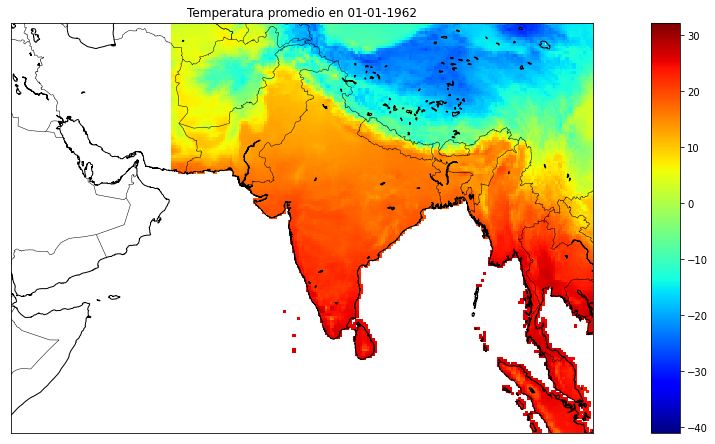

In [35]:
# Modificar el tamaño del gráfico
plt.figure(figsize=(12,8))

# Delimitar la visualización del mapa
mp = Basemap(
    projection = 'merc',
    llcrnrlon = 42.8,
    llcrnrlat = -2,
    urcrnrlon = 105.37,
    urcrnrlat = 38.78,
    resolution = 'i'
)

lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)


# tave[0,:,:] siginifica los datos de temperatura promedio durante el 01-01-1962
c_scheme = mp.pcolor(x, y, np.squeeze(tave[0,:,:]), cmap = 'jet')

mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')

plt.title('Temperatura promedio en 01-01-1962')

plt.show()


# 6 Crear un lapso de tiempo animado de temperatura utilizando datos de cuadrícula netCDF

## 6.1 Generación de imágenes de precipitación de cada día

In [36]:
# Creacion de la carpeta que guardará los gráficos de cada día
! mkdir animation/

In [ ]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap

# Leer el archivo netCDF
data = Dataset(r'netCDF_Temparature/APHRO_MA_TAVE_025deg_V1808.1962.nc')

# Obtener longitud
lons = data.variables['lon'][:]
# Obtener latutud
lats = data.variables['lat'][:]
# Obtener tiempo
time = data.variables['time'][:]
# Obtener temperatura
tave = data.variables['tave'][:]

# Modificar el tamaño del gráfico
plt.figure(figsize=(12,8))

# Delimitar la visualización del mapa
mp = Basemap(
    projection = 'merc',
    llcrnrlon = 42.8,
    llcrnrlat = -2,
    urcrnrlon = 105.37,
    urcrnrlat = 38.78,
    resolution = 'i'
)

lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)



# Crear los identificadores de los días del año
days = np.arange(0, 365)

# Crear gráficos de temperatura de cada día
for i in days:
    c_scheme = mp.pcolor(x, y, np.squeeze(tave[i,:,:]), cmap = 'jet')
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()

    cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')

    day = i + 1

    plt.title('Temperatura promedio: Día ' + str(day) + ' del año 1962')
    plt.clim(-40, 40)
    plt.savefig(fname = r'animation/' + str(day) + '.jpg')
    plt.clf()


## 6.2 Generación del GIF

In [38]:
import PIL
import numpy as np

# Lista donde se guardará las imágenes
image_frames = []

days = np.arange(1, 366)

# Loop para guardar las imágenes en una sola variable
for k in days:
    new_frame = PIL.Image.open(r'animation/' + str(k) + '.jpg')
    image_frames.append(new_frame)

In [39]:
# Creación del GIF
image_frames[0].save(
    'temperatura_timelapse.gif',
    format = 'GIF',
    append_images = image_frames[1:],
    save_all = True, duration = 200,
    loop = 0
)